In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os

In [58]:
#import the csv file
bike_df=pd.read_csv("day.csv")

In [59]:
#Shape of the dataset
bike_df.shape

(731, 16)

The dataset contains 731 observations and 16 attributes.

In [60]:
#Data types
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [61]:
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [62]:
#Rename the columns
bike_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [63]:
bike_df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [64]:
#Type casting the datetime and numerical attributes to category

bike_df['datetime']=pd.to_datetime(bike_df.datetime)

bike_df['season']=bike_df.season.astype('category')
bike_df['year']=bike_df.year.astype('category')
bike_df['month']=bike_df.month.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['weekday']=bike_df.weekday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weather_condition']=bike_df.weather_condition.astype('category')

In [65]:
# Short Summary of the dataset
bike_df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Missing value analysis**

In [66]:
#Missing values in dataset
bike_df.isnull().sum()
#No missing values present in training dataset.

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

**Univariate and Bivariate Analysis**

**Monthly distribution of counts**

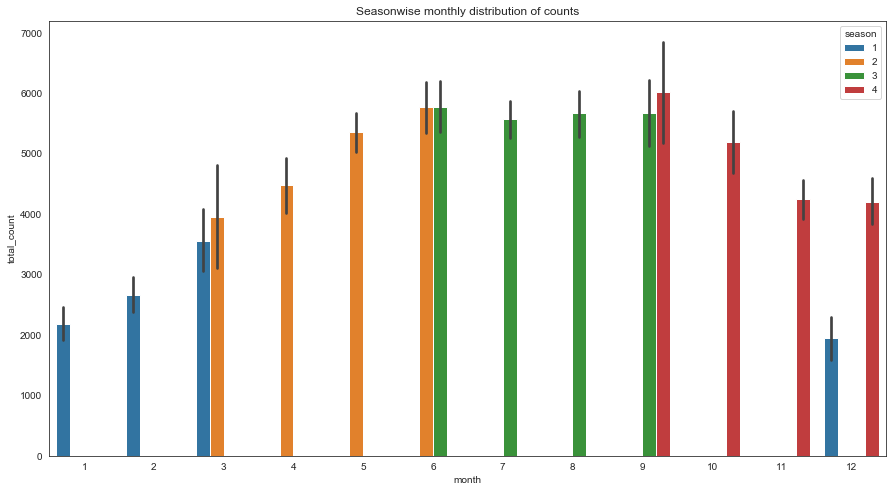

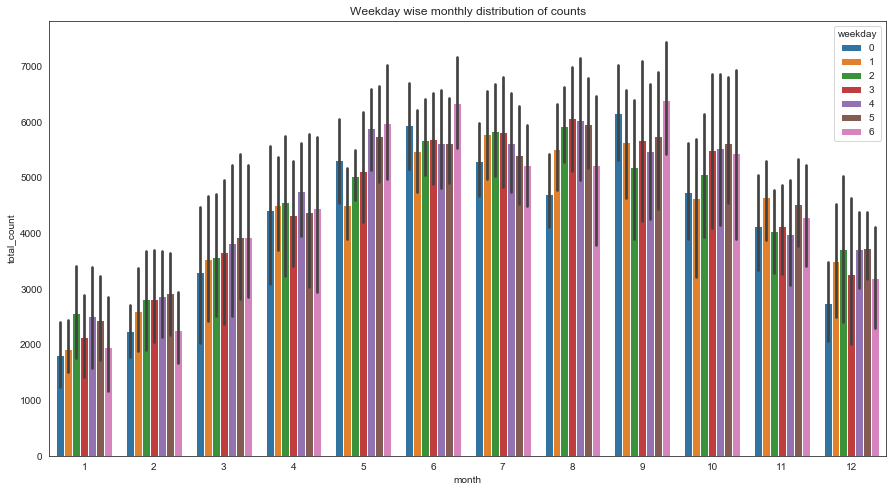

In [67]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')


sns.barplot(x='month',y='total_count',data=bike_df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=bike_df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

INFERENCE : Bike rental is high in summer and less in winter

**Yearly wise distribution of counts**

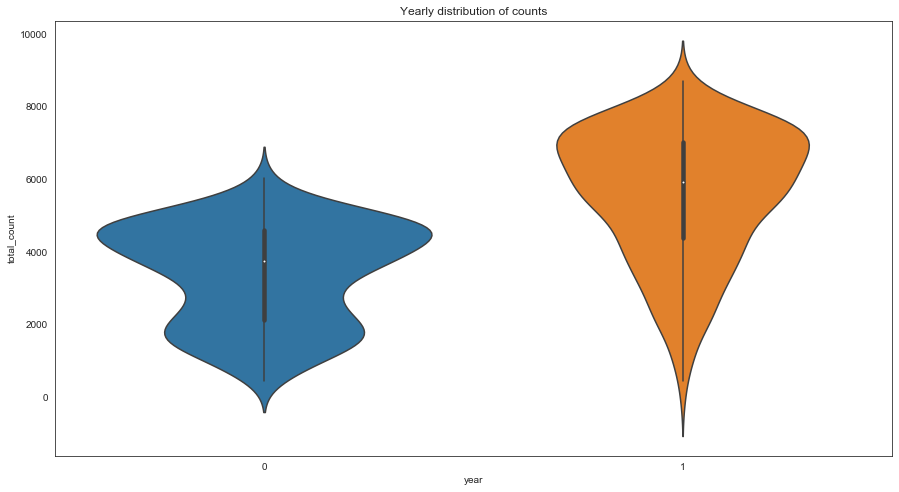

In [68]:
fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='year',y='total_count',data=bike_df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

INFERENCE: we can observe that the bike rental count distribution is highest in year 2012(1) than in year 2011(0). 

**Holiday distribution of counts**

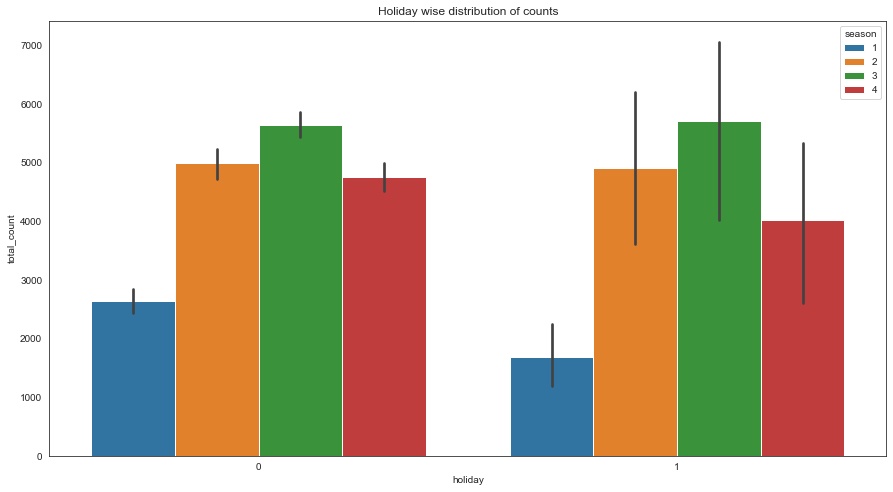

In [69]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

Inference: we can observe that during no holiday (0) the bike rental counts is highest compared to during holiday(1) for different seasons.

**Workingday distribution of counts**

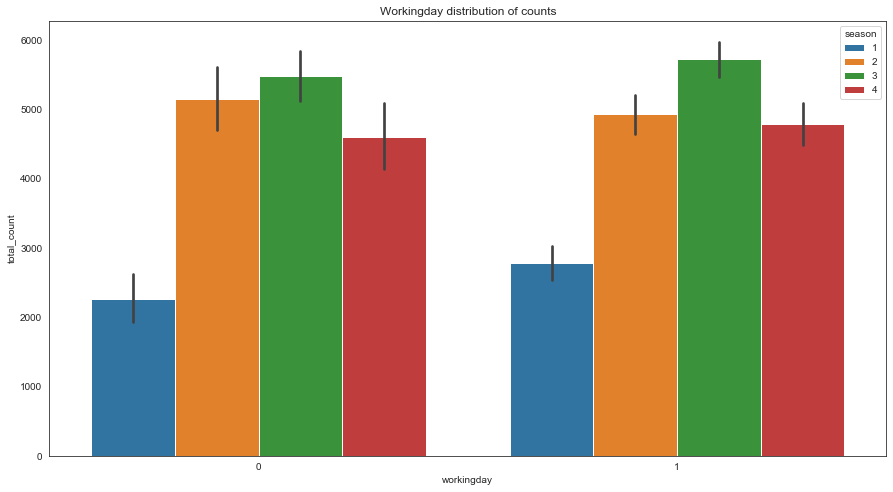

In [70]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday distribution of counts')
plt.show()

Inference :During workingday(1) the bike rental counts is higher compared to during no workingday(0) 

**Weather_condition distribution of counts**

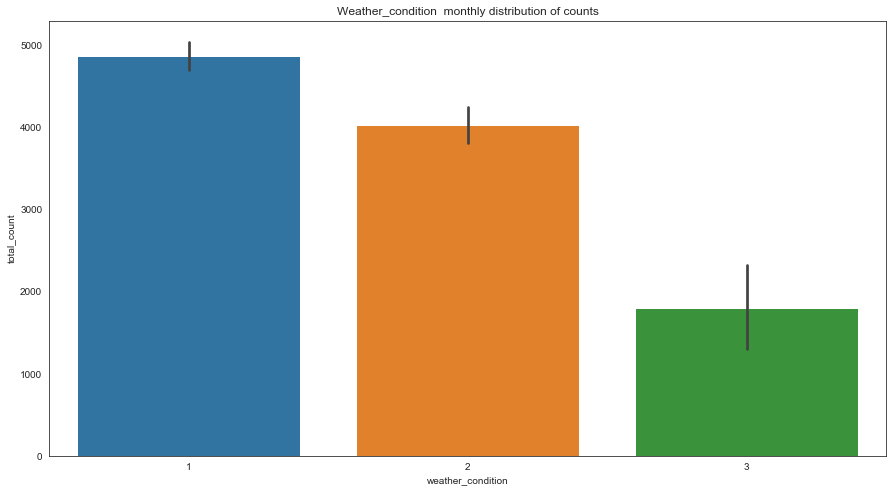

In [71]:
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='weather_condition',y='total_count',data=bike_df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition  monthly distribution of counts')
plt.show()

Inference: we can observe that during clear/partly cloudy(1) weather the bike rental count is highest and the second highest is during mist cloudy weather (2) and followed by third highest during light snow and light rain (3) weather.

**Outlier analysis**

**Total_Count_Outliers**

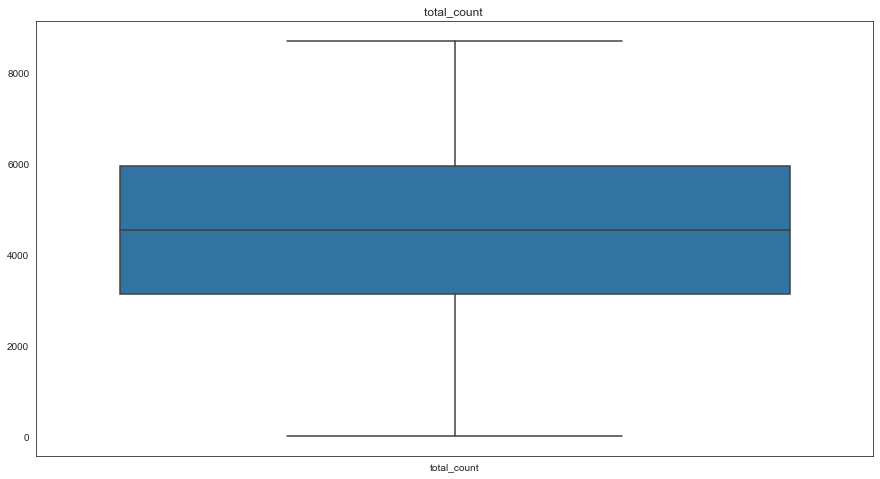

In [72]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=bike_df[['total_count']])
ax.set_title('total_count ')
plt.show()

From the box plot, we can observed that no outliers are present in total_count variable.

**Temp_windspeed_humidity_outliers**

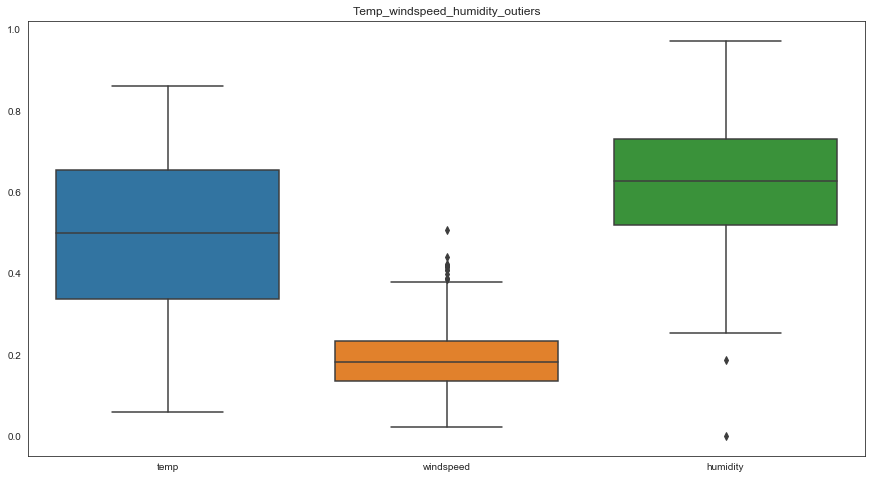

In [73]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=bike_df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

From the box plot, we can observe that no outliers are present in temperature but there are few outliers are present in  windspeed and humidity variable.

**Replace and impute the outliers**

In [74]:
wind_hum=pd.DataFrame(bike_df,columns=['windspeed','humidity'])                  
outliersv=['windspeed','humidity']       
                      
for i in outliersv:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) 
    iqr=q75-q25
    min=q25-(iqr*1.5) 
    max=q75+(iqr*1.5) 
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())

In [75]:
bike_df['windspeed']=bike_df['windspeed'].replace(wind_hum['windspeed'])
bike_df['humidity']=bike_df['humidity'].replace(wind_hum['humidity'])
bike_df.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Normal Probability Plot**

Normal probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

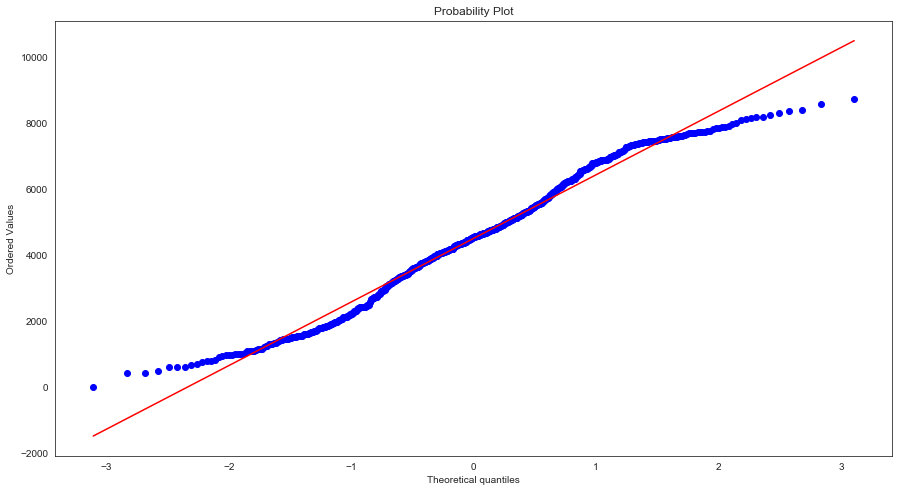

In [76]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bike_df.total_count.tolist(),dist='norm',plot=plt)
plt.show()

The above probability plot, the some target variable data points are deviates from normality.

**Correlation matrix**

Correlation matrix is tells about linear relationship between attributes and help us to build better models.

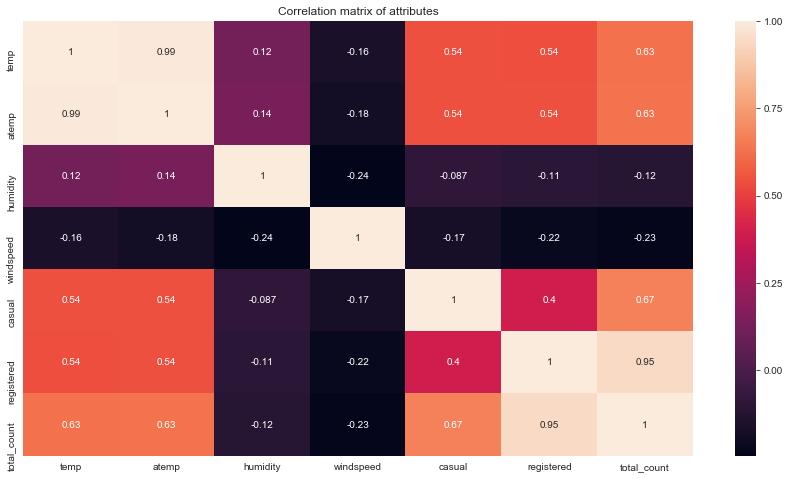

In [77]:
correMtr=bike_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

In [78]:
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [79]:
encoded_df=pd.get_dummies(bike_df,columns=cat_attributes)
encoded_df.head(5)

,rec_id,datetime,month,weekday,temp,atemp,humidity,windspeed,casual,registered,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,2011-01-01,1,6,0.344167,0.363625,0.805833,0.160446,331,654,...,0,1,0,1,0,0,1,0,1,0
1,2,2011-01-02,1,0,0.363478,0.353739,0.696087,0.248539,131,670,...,0,1,0,1,0,0,1,0,1,0
2,3,2011-01-03,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,0,1,0,0,1,1,0,0,1,0
3,4,2011-01-04,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,...,0,1,0,0,1,1,0,0,1,0
4,5,2011-01-05,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,...,0,1,0,0,1,1,0,0,1,0


In [80]:
encoded_df.columns

Index(['rec_id', 'datetime', 'month', 'weekday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_condition_1',
       'weather_condition_2', 'weather_condition_3', 'year_0', 'year_1'],
      dtype='object')

**Modelling the dataset**

In [81]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [160]:
#Split the dataset into the train and test data
X= encoded_df.drop(['total_count','datetime','rec_id','atemp','registered'],axis=1)
y=encoded_df['total_count']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(511, 19) (220, 19) (511,) (220,)


In [161]:
encoded_df.columns

Index(['rec_id', 'datetime', 'month', 'weekday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'weather_condition_1',
       'weather_condition_2', 'weather_condition_3', 'year_0', 'year_1'],
      dtype='object')

**Training dataset**

** RFE:

In [162]:
lr=linear_model.LinearRegression()
#lr.fit(X_train,y_train)

In [163]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
X_train.head()

,month,weekday,temp,humidity,windspeed,casual,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
223,8,5,0.708333,0.415000,0.125621,1051,0,0,1,0,1,0,0,1,1,0,0,1,0
684,11,4,0.321667,0.620417,0.152987,320,0,0,0,1,1,0,0,1,0,1,0,0,1
685,11,5,0.345000,0.524583,0.171025,484,0,0,0,1,1,0,0,1,1,0,0,0,1
163,6,1,0.635000,0.494583,0.305350,863,0,1,0,0,1,0,0,1,1,0,0,1,0
394,1,1,0.269167,0.400833,0.215792,126,1,0,0,0,1,0,0,1,1,0,0,0,1


In [165]:
from sklearn.feature_selection import RFE

sel_rfe = RFE(estimator=lr, n_features_to_select=10, step=1)
X_train_rfe = sel_rfe.fit_transform(X_train, y_train)

In [166]:
print(sel_rfe.get_support())

[False False  True  True  True False  True False False  True False  True
 False False  True False  True  True  True]


In [167]:
support=sel_rfe.get_support()
df_feature_names=np.array(X_train.columns)

In [168]:
df_feature_names[support]

array(['temp', 'humidity', 'windspeed', 'season_1', 'season_4',
       'holiday_1', 'weather_condition_1', 'weather_condition_3',
       'year_0', 'year_1'], dtype=object)

**Linear Regression Model**

In [169]:
X=encoded_df[['month', 'weekday', 'temp', 'humidity', 'windspeed',
        'casual', 'season_1', 'season_3', 'holiday_0',
       'weather_condition_1', 'weather_condition_2',
       'weather_condition_3', 'year_1']]


In [170]:
y =encoded_df['total_count']

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [172]:
#training model
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Accuracy of model**

In [173]:
#Accuracy of the model
lr_model=lr.score(X,y)
print('Accuracy of the model :',lr_model)

Accuracy of the model : 0.8490567160247658


**Decoding the test attributes**

**Model performance on test dataset**

In [174]:
y_test.shape

(220,)

**Predict the model**

In [175]:
#predict the model
lr_pred=lr.predict(X_test)

In [176]:
lr_pred.shape

(220,)

**Model evaluation metrics**

**Root mean square error and mean absolute error scores**

In [177]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 759.4475587247849
Mean absolute error : 575.5937135740202


**Residual plot**

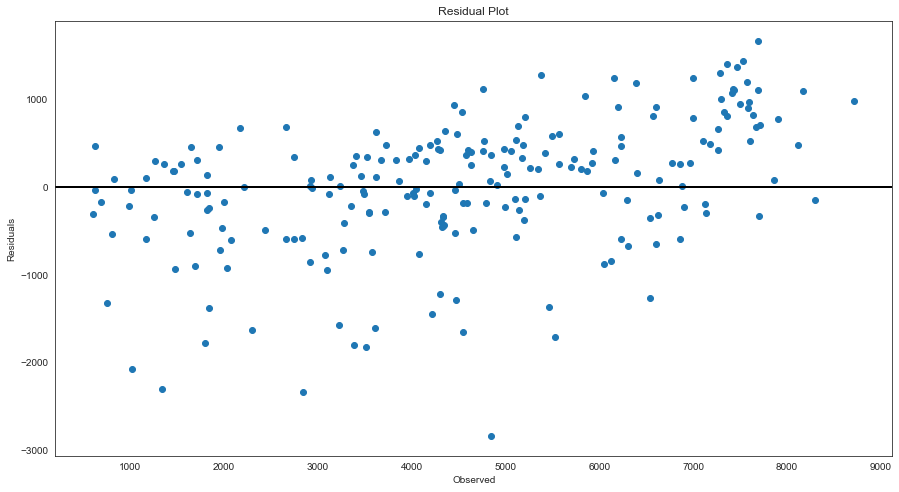

In [178]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(y_test, y_test-lr_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

Residual plot tells about finite variance between actual target value and predicted target value.In this plot,very less data points are have same finite variance between them and for most are not have it.

In [151]:
# Without RFE

In [179]:
X= encoded_df.drop(['total_count','datetime','rec_id','atemp','registered'],axis=1)
y=encoded_df['total_count']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(511, 19) (220, 19) (511,) (220,)


In [180]:
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
from sklearn.metrics import *

In [182]:
lpred=lr.predict(X_test)

In [183]:
acc=lr.score(X_test,y_test)

In [184]:
acc

0.9014706601356357

In [185]:
rmse=math.sqrt(metrics.mean_squared_error(y_test,lpred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lpred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 626.134890335674
Mean absolute error : 468.6171373529866


In [186]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression

In [187]:
m1=LinearRegression()
m2=Ridge(alpha=0.5,normalize=True)
m3=Lasso(alpha=0.1,normalize=True)

In [188]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=0)

for model,name in zip([m1,m2,m3],['LR','Ridge','Lasso']):
    r2=[]
    print(name)
    for train,test in kf.split(X,y):
        X_train,X_test=X.iloc[train,:],X.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        r2.append(r2_score(y_test,y_pred))
    print('R2:',r2) 
    print("Mean R2 score: ",np.mean(r2))

LR
R2: [0.9140114619334839, 0.8815698236892656, 0.8899972767109481, 0.8942860736486294, 0.8783837147396985]
Mean R2 score:  0.891649670144405
Ridge
R2: [0.8610750379687215, 0.828504836992451, 0.8591937088701944, 0.8517730034387366, 0.844565464584847]
Mean R2 score:  0.84902241037099
Lasso
R2: [0.9138010327991726, 0.8819355894293373, 0.89025817210312, 0.8944029268413781, 0.8786732351756982]
Mean R2 score:  0.8918141912697413
